# Implementing AND gate using percepton

In [23]:
from sklearn.linear_model import Perceptron

#training data for AND
x_train=[[0,0],[0,1],[1,0],[1,1]]
y_train=[0,0,0,1]

classifier=Perceptron(tol=1e-3,random_state=0)
classifier.fit(x_train,y_train)

Perceptron()

In [24]:
y_pred=classifier.predict(x_train)

In [25]:
print(y_pred)
print(classifier.coef_,classifier.intercept_)

[0 0 0 1]
[[2. 2.]] [-2.]


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

In [27]:
df=pd.read_csv('diabetes.csv')
#print(df)
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [28]:
#extracting independent and dependent
y=df['Outcome']
print(y)
df=df.drop(['Outcome'],axis=1)
x=df
cols=df.columns
print(cols)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


In [30]:
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0.52941176 0.44949495 0.50819672 ... 0.33532042 0.02732707 0.2       ]
 [0.05882353 0.5959596  0.47540984 ... 0.49627422 0.07813834 0.03333333]
 [0.         0.45959596 0.6557377  ... 0.4828614  0.22331341 0.1       ]
 ...
 [0.23529412 0.47474747 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.64705882 0.42929293 0.60655738 ... 0.4485842  0.09479078 0.23333333]
 [0.29411765 0.68686869 0.67213115 ... 0.         0.23996584 0.8       ]]


In [31]:
classifier=MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=500)
classifier.fit(x_train,y_train)

x_pred=classifier.predict(x_train)
y_pred=classifier.predict(x_test)


In [32]:
print(y_test.values)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]
[1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1
 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1
 0 1 0 1 0 0 0]


In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[89 41]
 [13 49]]


In [34]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_train,x_pred)
print(cm1)

[[323  47]
 [ 70 136]]


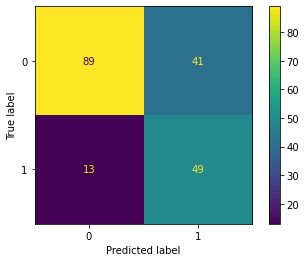

In [35]:
#confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

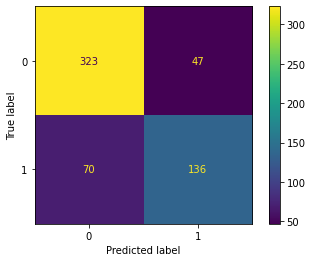

In [36]:
#confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier.classes_)
disp.plot()

In [37]:
#classifier intercepts
classifier.coefs_


[array([[-9.58377132e-02, -4.98321164e-01, -3.34151984e-01,
          6.98276677e-01,  7.30863016e-02,  2.36409932e-08,
          3.69285815e-20,  5.07214617e-01],
        [ 3.21692949e-01,  5.89206404e-01,  2.13504756e-01,
          4.02235386e-01, -1.96801473e-01, -2.24013212e-14,
         -2.63482697e-07,  6.33503895e-01],
        [-4.27087130e-01, -1.98447165e-01,  3.27570115e-01,
         -2.69827483e-01,  6.93736686e-01,  8.72319792e-03,
         -1.47239275e-03, -4.32705523e-02],
        [-1.78261717e-01,  2.41883113e-01, -1.88235554e-01,
          7.25332605e-01, -4.15931273e-01,  2.81136725e-05,
          7.47626241e-08,  3.64064041e-02],
        [ 3.04508559e-01,  1.32037197e-01, -7.03082025e-01,
         -3.69089384e-01,  4.80667958e-01,  7.19034422e-09,
          9.99432234e-27,  4.58341965e-01],
        [ 4.51411306e-01,  3.92994376e-01,  7.27146445e-01,
          6.04674560e-01,  2.86215684e-01, -3.21830366e-05,
         -1.48413712e-03,  3.24214710e-01],
        [-4.7824

In [38]:
classifier.intercepts_

[array([ 0.50002272, -0.28202808, -0.30503293,  0.67132608, -0.10453206,
        -0.55051535, -0.29293697, -0.42327822]),
 array([-0.05029358,  0.07717188, -0.00363557,  0.34613829,  0.51541575,
        -0.68115587,  0.84021711, -0.02367503]),
 array([ 0.3025236 , -0.07059295,  0.66638542,  0.27698189,  0.29906155,
         0.21099215, -0.56492875,  0.26272397]),
 array([0.44441515])]